#  <font color=red> Module_02_數值與統計方法</font>

## 對序列與資料框執行算術運算

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(5, 4), columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.028306,2.616736,0.556538,-1.263278
1,0.518611,0.701220,-1.387129,1.196076
2,-0.687462,-1.419639,0.848810,-0.191467
3,-0.438590,-1.135603,0.364175,-0.529732
4,-1.028229,-0.334259,-0.220285,0.528705


In [2]:
# 每個資料乘 2
df*2 

,A,B,C,D
0,-0.056611,5.233472,1.113077,-2.526555
1,1.037223,1.402440,-2.774259,2.392153
2,-1.374925,-2.839278,1.697620,-0.382935
3,-0.877181,-2.271206,0.728351,-1.059463
4,-2.056458,-0.668519,-0.440570,1.057410


In [3]:
# 每個資料 + 1
df + 1

,A,B,C,D
0,0.971694,3.616736,1.556538,-0.263278
1,1.518611,1.701220,-0.387129,2.196076
2,0.312538,-0.419639,1.848810,0.808533
3,0.561410,-0.135603,1.364175,0.470268
4,-0.028229,0.665741,0.779715,1.528705


---

In [4]:
df

,A,B,C,D
0,-0.028306,2.616736,0.556538,-1.263278
1,0.518611,0.701220,-1.387129,1.196076
2,-0.687462,-1.419639,0.848810,-0.191467
3,-0.438590,-1.135603,0.364175,-0.529732
4,-1.028229,-0.334259,-0.220285,0.528705


In [5]:
s = df.iloc[0]
s

A   -0.028306
B    2.616736
C    0.556538
D   -1.263278
Name: 0, dtype: float64

In [6]:
# 序列索引與資料框的行索引的聯集 
# 依照對齊規則，依照行對齊
diff = df - s 
diff

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.546917,-1.915516,-1.943668,2.459354
2,-0.659157,-4.036375,0.292271,1.071810
3,-0.410285,-3.752339,-0.192363,0.733546
4,-0.999923,-2.950995,-0.776823,1.791983


In [7]:
diff2 = s - df
diff2

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.546917,1.915516,1.943668,-2.459354
2,0.659157,4.036375,-0.292271,-1.071810
3,0.410285,3.752339,0.192363,-0.733546
4,0.999923,2.950995,0.776823,-1.791983


---

In [8]:
s2 = s[1:3]
s2

B    2.616736
C    0.556538
Name: 0, dtype: float64

In [9]:
s2['E'] = 0
s2

B    2.616736
C    0.556538
E    0.000000
Name: 0, dtype: float64

In [10]:
df

,A,B,C,D
0,-0.028306,2.616736,0.556538,-1.263278
1,0.518611,0.701220,-1.387129,1.196076
2,-0.687462,-1.419639,0.848810,-0.191467
3,-0.438590,-1.135603,0.364175,-0.529732
4,-1.028229,-0.334259,-0.220285,0.528705


In [11]:
df + s2 # 序列索引與資料框的行索引的聯集 # 依照對齊規則，對行對齊

,A,B,C,D,E
0,NaN,5.233472,1.113077,NaN,NaN
1,NaN,3.317956,-0.830591,NaN,NaN
2,NaN,1.197097,1.405348,NaN,NaN
3,NaN,1.481133,0.920714,NaN,NaN
4,NaN,2.282477,0.336253,NaN,NaN


---

In [12]:
subframe = df[1:4][['B', 'C']]
subframe

,B,C
1,0.701220,-1.387129
2,-1.419639,0.848810
3,-1.135603,0.364175


In [13]:
df - subframe # 行列會對齊

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,0.0,0.0,NaN
2,NaN,0.0,0.0,NaN
3,NaN,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN


---

In [14]:
df

,A,B,C,D
0,-0.028306,2.616736,0.556538,-1.263278
1,0.518611,0.701220,-1.387129,1.196076
2,-0.687462,-1.419639,0.848810,-0.191467
3,-0.438590,-1.135603,0.364175,-0.529732
4,-1.028229,-0.334259,-0.220285,0.528705


In [15]:
a_col = df['A']
a_col

0   -0.028306
1    0.518611
2   -0.687462
3   -0.438590
4   -1.028229
Name: A, dtype: float64

In [16]:
df + a_col

,A,B,C,D,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# 等於 df + a_col
# df.sub() 方法的好處是有 axis 參數可以使用
# df.add()、df.sub()、df.mul()、df.div() 方法類似
df.sub(a_col, axis = 1) 

,A,B,C,D,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.sub(a_col, axis = 0)

,A,B,C,D
0,0.0,2.645042,0.584844,-1.234972
1,0.0,0.182609,-1.905741,0.677465
2,0.0,-0.732176,1.536272,0.495995
3,0.0,-0.697013,0.802766,-0.091141
4,0.0,0.693969,0.807944,1.556934


---

In [19]:
df1 = pd.DataFrame(np.arange(12).reshape(3, 4), columns = list('abcd') )
df1

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [20]:
df2 = pd.DataFrame(np.arange(20).reshape(4, 5), columns = list('abcde') )
df2

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [21]:
# 對列跟行對齊
df1 + df2 

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [22]:
# Fill missing (NaN) values with this value. If both DataFrame locations are missing, the result will be missing.
df1.add(df2, fill_value = 0) 

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [23]:
# inf 表示無窮大    # 1/0.1 = 10, 1/0.01 = 100, 1/0.001 = 1000, .... => inf 
1/df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


---

In [24]:
df = pd.DataFrame(np.arange(1, 5).reshape(2, 2), columns = ['a', 'b'])
df

,a,b
0,1,2
1,3,4


In [25]:
df.div(2)

,a,b
0,0.5,1.0
1,1.5,2.0


In [26]:
# 數學運算方法加 r 通常代表反向
df.rdiv(2) 

,a,b
0,2.000000,1.0
1,0.666667,0.5


## 讀取值出現次數的資訊

In [27]:
# Nat a number
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
s

0      a
1      a
2      b
3      c
4    NaN
dtype: object

In [28]:
s.count() # 出現非 NaN 的次數

4

---

In [29]:
df = pd.DataFrame(np.array([
      [1, np.NaN, 2],
      [np.NaN, np.NaN, 3],
      [3, 4, np.NaN]
]), columns = ['A', 'B', 'C'])

df

,A,B,C
0,1.0,NaN,2.0
1,NaN,NaN,3.0
2,3.0,4.0,NaN


In [30]:
df.count()

A    2
B    1
C    2
dtype: int64

In [31]:
df.count(axis = 1)

0    2
1    1
2    2
dtype: int64

## 決定唯一值、出現次數與成員關係

In [32]:
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
s

0      a
1      a
2      b
3      c
4    NaN
dtype: object

In [33]:
s.unique() # 包含 NaN # 只能用在序列

array(['a', 'b', 'c', nan], dtype=object)

In [34]:
s.nunique() # 不包含 NaN # 求不同的非 NaN 數有幾個 

3

In [35]:
s.nunique(dropna = False) # 包含 NaN 

4

---

In [36]:
h = s.value_counts(dropna = False) # 預設 dropna = True 且 sort = True
h

a      2
b      1
c      1
NaN    1
dtype: int64

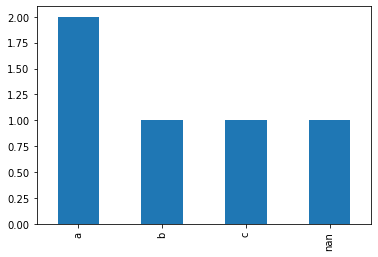

In [37]:
# 繪出柱狀圖，之後會學到
h.plot(kind = 'bar')
plt.show()

In [38]:
pd.value_counts(s, dropna = False) # 有函式可用

a      2
b      1
c      1
NaN    1
dtype: int64

---

In [39]:
df = pd.DataFrame(np.array([
      [1, np.NaN, 2],
      [np.NaN, np.NaN, 3],
      [3, 4, np.NaN]
]), columns = ['A', 'B', 'C'])

df

,A,B,C
0,1.0,NaN,2.0
1,NaN,NaN,3.0
2,3.0,4.0,NaN


In [40]:
df.nunique(axis = 0, dropna = False)

A    3
B    2
C    3
dtype: int64

In [41]:
df.nunique(axis = 1)

0    2
1    1
2    2
dtype: int64

---

In [42]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [43]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [44]:
pd.value_counts(obj, sort = False)

c    3
a    3
d    1
b    2
dtype: int64

---

In [45]:
# 成員關係
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [46]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

---

In [47]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
to_match

0    c
1    a
2    b
3    b
4    c
5    a
dtype: object

In [48]:
unique_vals

0    c
1    b
2    a
dtype: object

In [49]:
# 用 pd.Index 建立 Index 物件
idx = pd.Index(unique_vals)
idx

Index(['c', 'b', 'a'], dtype='object')

In [50]:
# 使用 Index 物件的方法
idx.get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

## 找出最小值與最大值

In [51]:
omh = pd.read_csv('./mod02/omh.csv')
omh

,Date,MSFT,AAPL
0,2014-12-01,48.62,115.07
1,2014-12-02,48.46,114.63
2,2014-12-03,48.08,115.93
3,2014-12-04,48.84,115.49
4,2014-12-05,48.42,115.00
5,2014-12-08,47.70,112.40
6,2014-12-09,47.59,114.12
7,2014-12-10,46.90,111.95
8,2014-12-11,47.17,111.62
9,2014-12-12,46.95,109.73


In [52]:
# 在執行分析方法，要考慮到每個欄位的可執行性跟合理性
omh.min()

Date    2014-12-01
MSFT         45.16
AAPL        106.75
dtype: object

In [53]:
omh[['MSFT', 'AAPL']].min()

MSFT     45.16
AAPL    106.75
dtype: float64

In [54]:
omh[['MSFT', 'AAPL']].max()

MSFT     48.84
AAPL    115.93
dtype: float64

In [55]:
omh[['MSFT', 'AAPL']].min(axis = 1)

0     48.62
1     48.46
2     48.08
3     48.84
4     48.42
5     47.70
6     47.59
7     46.90
8     47.17
9     46.95
10    46.67
11    45.16
12    45.74
13    47.52
14    47.66
15    47.98
16    48.45
17    48.14
18    47.88
19    47.45
20    47.02
21    46.45
dtype: float64

---

In [56]:
omh[['MSFT', 'AAPL']].idxmin() # 間接統計 # 回傳索引標籤

MSFT    11
AAPL    11
dtype: int64

In [57]:
omh[['MSFT', 'AAPL']].idxmax() # 間接統計 # 回傳索引標籤

MSFT    3
AAPL    2
dtype: int64

In [58]:
omh[['MSFT', 'AAPL']].idxmin(axis = 1)

0     MSFT
1     MSFT
2     MSFT
3     MSFT
4     MSFT
5     MSFT
6     MSFT
7     MSFT
8     MSFT
9     MSFT
10    MSFT
11    MSFT
12    MSFT
13    MSFT
14    MSFT
15    MSFT
16    MSFT
17    MSFT
18    MSFT
19    MSFT
20    MSFT
21    MSFT
dtype: object

## 找出 n 個最小值及最大值

In [59]:
omh = pd.read_csv('./mod02/omh.csv')
omh

,Date,MSFT,AAPL
0,2014-12-01,48.62,115.07
1,2014-12-02,48.46,114.63
2,2014-12-03,48.08,115.93
3,2014-12-04,48.84,115.49
4,2014-12-05,48.42,115.00
5,2014-12-08,47.70,112.40
6,2014-12-09,47.59,114.12
7,2014-12-10,46.90,111.95
8,2014-12-11,47.17,111.62
9,2014-12-12,46.95,109.73


In [60]:
omh.nsmallest(4, ['MSFT']) # 傳回 Dataframe # 以遞增呈現

,Date,MSFT,AAPL
11,2014-12-16,45.16,106.75
12,2014-12-17,45.74,109.41
21,2014-12-31,46.45,110.38
10,2014-12-15,46.67,108.23


In [61]:
omh.nsmallest(4, ['MSFT'])['MSFT']

11    45.16
12    45.74
21    46.45
10    46.67
Name: MSFT, dtype: float64

In [62]:
# 對 MSFT 的股價由小排到大
omh.nsmallest(len(omh), ['MSFT'])

,Date,MSFT,AAPL
11,2014-12-16,45.16,106.75
12,2014-12-17,45.74,109.41
21,2014-12-31,46.45,110.38
10,2014-12-15,46.67,108.23
7,2014-12-10,46.90,111.95
9,2014-12-12,46.95,109.73
20,2014-12-30,47.02,112.52
8,2014-12-11,47.17,111.62
19,2014-12-29,47.45,113.91
13,2014-12-18,47.52,112.65


---

In [63]:
omh.nlargest(4, ['MSFT']) # 以遞減的方式呈現

,Date,MSFT,AAPL
3,2014-12-04,48.84,115.49
0,2014-12-01,48.62,115.07
1,2014-12-02,48.46,114.63
16,2014-12-23,48.45,112.54


In [64]:
omh.nlargest(4, ['MSFT'])['MSFT'] 

3     48.84
0     48.62
1     48.46
16    48.45
Name: MSFT, dtype: float64

In [65]:
omh.MSFT.nlargest(4) # 序列的用法

3     48.84
0     48.62
1     48.46
16    48.45
Name: MSFT, dtype: float64

## 計算累計值

In [66]:
a = pd.Series([1, 2, 3, 4])
a

0    1
1    2
2    3
3    4
dtype: int64

In [67]:
a.cumprod() # cumulative product

0     1
1     2
2     6
3    24
dtype: int64

In [68]:
a.cumsum() # cumulative sum

0     1
1     3
2     6
3    10
dtype: int64

---

In [69]:
df = pd.DataFrame(np.arange(9).reshape(3, 3), columns = list('abc'))
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [70]:
df.cumsum()

,a,b,c
0,0,1,2
1,3,5,7
2,9,12,15


In [71]:
df.cumsum(axis = 1)

,a,b,c
0,0,1,3
1,3,7,12
2,6,13,21


In [72]:
df.cumprod(axis = 1)

,a,b,c
0,0,0,0
1,3,12,60
2,6,42,336


## 提取概括敘述統計量

In [73]:
omh = pd.read_csv('./mod02/omh.csv')
omh[:5]

,Date,MSFT,AAPL
0,2014-12-01,48.62,115.07
1,2014-12-02,48.46,114.63
2,2014-12-03,48.08,115.93
3,2014-12-04,48.84,115.49
4,2014-12-05,48.42,115.00


In [74]:
omh.describe() # Date 這一行非數值，所以沒有顯示

,MSFT,AAPL
count,22.000000,22.000000
mean,47.493182,112.411364
std,0.933077,2.388772
min,45.160000,106.750000
25%,46.967500,111.660000
50%,47.625000,112.530000
75%,48.125000,114.087500
max,48.840000,115.930000


In [75]:
omh.MSFT.describe() # 序列的使用

count    22.000000
mean     47.493182
std       0.933077
min      45.160000
25%      46.967500
50%      47.625000
75%      48.125000
max      48.840000
Name: MSFT, dtype: float64

In [76]:
omh.MSFT.describe()['mean']

47.493181818181824

---

In [77]:
s = pd.Series(['a', 'a', 'b', 'b', 'b', 'c', np.NaN])
s

0      a
1      a
2      b
3      b
4      b
5      c
6    NaN
dtype: object

In [78]:
s.describe() # 非數值型資料 # top: 最常出現值、freq: 出現次數

count     6
unique    3
top       b
freq      3
dtype: object

In [79]:
omh.Date.describe()

count             22
unique            22
top       2014-12-01
freq               1
Name: Date, dtype: object

## 測量集中趨勢: 平均值、中位數、眾數

---

$$\mu = \frac{1}{N}\sum_{i=1}^{N}X_i$$

$$\overline{X} = \frac{1}{n}\sum_{i=1}^{n}X_i$$

$$\sum_{i=1}^{N}(X_i -\mu)^2 \le \sum_{i=1}^{N}(X_i - a)^2, \ \ \forall a$$

$$\sum_{i=1}^{n}(X_i -\overline{X})^2 \le \sum_{i=1}^{n}(X_i - a)^2, \ \ \forall a$$

$$\overline{X} = \frac{1}{5}\sum_{i=1}^{5}X_i = \frac{1+3+2+4+5}{5} = 3 $$

$$\sum_{i=1}^{5}(X_i -\overline{X})^2 = (1-3)^2 + (3-3)^2 + (2-3)^2 + (4-3)^2 + (5-3)^2 = 10$$

---

In [80]:
omh = pd.read_csv('./mod02/omh.csv')
omh[:5]

,Date,MSFT,AAPL
0,2014-12-01,48.62,115.07
1,2014-12-02,48.46,114.63
2,2014-12-03,48.08,115.93
3,2014-12-04,48.84,115.49
4,2014-12-05,48.42,115.00


In [81]:
omh.mean(numeric_only = True)

MSFT     47.493182
AAPL    112.411364
dtype: float64

In [82]:
omh.mean(numeric_only = True, axis = 1)[:5]

0    81.845
1    81.545
2    82.005
3    82.165
4    81.710
dtype: float64

---

In [83]:
df = pd.DataFrame([[1.4, np.NaN], [7.1, -4.5]], index = ['a', 'b'], columns = ['one', 'two'])
df

,one,two
a,1.4,NaN
b,7.1,-4.5


In [84]:
df.sum()

one    8.5
two   -4.5
dtype: float64

In [85]:
df.sum(skipna = False)

one    8.5
two    NaN
dtype: float64

In [86]:
# 預設是忽略 NaN
df.mean()

one    4.25
two   -4.50
dtype: float64

In [87]:
df.mean(skipna = False)

one    4.25
two     NaN
dtype: float64

In [88]:
df.mean(axis = 1)

a    1.4
b    1.3
dtype: float64

In [89]:
df.mean(axis = 1, skipna = False)

a    NaN
b    1.3
dtype: float64

---

In [90]:
medi = omh.median(numeric_only = True) 
medi

MSFT     47.625
AAPL    112.530
dtype: float64

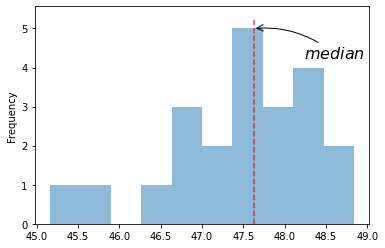

In [91]:
omh.MSFT.plot(kind = 'hist', bins = 10, alpha = 0.5)
plt.plot([medi['MSFT'], medi['MSFT']], [0, 5.3], 'r--', alpha = 0.7)

plt.annotate(r'$median$', xy = (medi['MSFT'], 5), xycoords = 'data', xytext = (50, -30),
             textcoords='offset points', fontsize = 16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))
plt.show()

In [92]:
omh.median(numeric_only = True, axis = 1)[:5]

0    81.845
1    81.545
2    82.005
3    82.165
4    81.710
dtype: float64

---

In [93]:
df = pd.DataFrame([
    [1, 2, 1],
    [1, 3, 2],
    [2, 3, 3],
    [2, 3, 4]
], columns = ['a', 'b', 'c'])

df

,a,b,c
0,1,2,1
1,1,3,2
2,2,3,3
3,2,3,4


In [94]:
df.mode() # 返回資料框 # 眾數不唯一

,a,b,c
0,1.0,3.0,1
1,2.0,NaN,2
2,NaN,NaN,3
3,NaN,NaN,4


In [95]:
df['b'].mode() # 返回序列

0    3
dtype: int64

In [96]:
df.a.mode()

0    1
1    2
dtype: int64

In [97]:
df.mode(axis = 1) # 注意資料的放置

,0,1,2
0,1.0,NaN,NaN
1,1.0,2.0,3.0
2,3.0,NaN,NaN
3,2.0,3.0,4.0


---

 <img src="./mod02/2.png" style='height:452px; width:964px'><br>

## 測量分散程度: 變異數及標準差

$$\sigma^2 = \frac{1}{N}\sum_{i=1}^{N}(X_i - \mu)^2$$

$$S^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i - \overline{X})^2$$

$$\sigma = \sqrt{\sigma^{2}}$$

$$S = \sqrt{S^{2}}$$

---

$$S^2 = \frac{1}{3}\sum_{i=1}^{4}(X_i - \overline{X})^2 = \frac{1}{3}\left[(10-11)^2 +(8-11)^2+(10-11)^2+(16-11)^2\right]
=12$$


$$S = \sqrt{S^{2}} = \sqrt{12} = 3.46$$ 

In [98]:
data = np.array([10, 8, 10, 16])
data

array([10,  8, 10, 16])

In [99]:
data.var() # ndarray的 .var() 方法預設是 ddof = 0，母體變異數

9.0

In [100]:
data.var(ddof = 1) # 樣本變異數

12.0

In [101]:
data.std() # ndarray的 .std() 方法預設是 ddof = 0，母體變異數

3.0

In [102]:
data.std(ddof = 1) # 樣本標準差

3.4641016151377544

In [103]:
s = pd.Series(data)
s

0    10
1     8
2    10
3    16
dtype: int32

In [104]:
s.var() # 序列跟資料框預設是 ddof = 1 ，也就是樣本變異數

12.0

In [105]:
s.std() # 序列跟資料框預設是 ddof = 1 ，也就是樣本標準差

3.4641016151377544

---

In [106]:
omh = pd.read_csv('./mod02/omh.csv')
omh[:5]

,Date,MSFT,AAPL
0,2014-12-01,48.62,115.07
1,2014-12-02,48.46,114.63
2,2014-12-03,48.08,115.93
3,2014-12-04,48.84,115.49
4,2014-12-05,48.42,115.00


In [107]:
omh.var(numeric_only = True) # 樣本變異數

MSFT    0.870632
AAPL    5.706231
dtype: float64

In [108]:
omh.std(numeric_only = True) # 樣本標準差

MSFT    0.933077
AAPL    2.388772
dtype: float64

## 決定共變異數及相關係數

><img src="./mod02/1.png" style='height:452px; width:964px'><br>

---

$$S_{XX} = \sum_{i=1}^{n}(X_i - \overline{X})^2$$
$$S_{YY} = \sum_{i=1}^{n}(Y_i - \overline{Y})^2$$
$$S_{XY} = \sum_{i=1}^{n}(X_{i}-\overline{X})(Y_{i}-\overline{Y})$$

$$S_{X}^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i - \overline{X})^2 = \frac{1}{n-1}S_{XX}$$
$$S_{Y}^2 = \frac{1}{n-1}\sum_{i=1}^{n}(Y_i - \overline{Y})^2 = \frac{1}{n-1}S_{YY}$$

---

$$\hat{\sigma}_{XY} = \frac{1}{n-1}\sum_{i=1}^{n}(X_{i}-\overline{X})(Y_{i}-\overline{Y}) = \frac{1}{n-1}S_{XY}$$

| 月份   | 1      | 2      |3      |4      |5     |6       |平均數      |
| :-----:| :----: | :----: |:----: |:----: |:----: |:----: |:----: |
| A      | 5      | 6      |8      |4      |5      |7      |5.83 |
| B      | 8      | 12     |15     |13     |11     |11      |11.67 |

$$\hat{\sigma}_{AB} = \frac{1}{6-1}\sum_{i=1}^{6}(A_{i}-\overline{A})(B_{i}-\overline{B}) 
=\frac{1}{6-1}\left[(5-5.83)(8-11.67)+...+(7-5.83)(11-11.67)  \right] = \frac{7.67}{5} = 1.53$$

---

$$r_{XY} = \frac{\hat{\sigma}_{XY}}{S_{X}‧S_{Y}} = \frac{\frac{1}{n-1}\sum_{i=1}^{n}(X_{i}-\overline{X})(Y_{i}-\overline{Y})}{\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(X_i - \overline{X})^2}‧\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(Y_i - \overline{Y})^2}}=
 \frac{\sum_{i=1}^{n}(X_{i}-\overline{X})(Y_{i}-\overline{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \overline{X})^2}‧\sqrt{\sum_{i=1}^{n}(Y_i - \overline{Y})^2}} = \frac{S_{XY}}{\sqrt{S_{XX}S_{YY}}}$$

| 月份   | 1      | 2      |3      |4      |5     |6       |平均數      |
| :-----:| :----: | :----: |:----: |:----: |:----: |:----: |:----: |
| A      | 5      | 6      |8      |4      |5      |7      |5.83 |
| B      | 8      | 12     |15     |13     |11     |11      |11.67 |

$$r_{XY} = \frac{\hat{\sigma}_{XY}}{S_{X}‧S_{Y}} =
 \frac{\sum_{i=1}^{6}(X_{i}-\overline{X})(Y_{i}-\overline{Y})}{\sqrt{\sum_{i=1}^{6}(X_i - \overline{X})^2}‧\sqrt{\sum_{i=1}^{6}(Y_i - \overline{Y})^2}} = \frac{7.67}{17.21} = 0.4455 $$


$$ r_{XY} = -1 , \ \ 完全負相關$$


\begin{cases}
-1 < r_{XY} < -0.5 ,& 強負相關\\
r_{XY} = -0.5 ,& 中等負相關\\
-0.5 < r_{XY} < 0 ,& 弱負相關
\end{cases}

$$ r_{XY} = 0 , \ \  零相關$$

\begin{cases}
0 < r_{XY} <  0.5 ,& 弱正相關\\
r_{XY} =  0.5 ,& 中等正相關\\
 0.5 < r_{XY} < 1 ,& 強正相關
\end{cases}

$$ r_{XY} = 1 , \ \ 完全正相關$$

In [109]:
omh = pd.read_csv('./mod02/omh.csv')
omh[:5]

,Date,MSFT,AAPL
0,2014-12-01,48.62,115.07
1,2014-12-02,48.46,114.63
2,2014-12-03,48.08,115.93
3,2014-12-04,48.84,115.49
4,2014-12-05,48.42,115.00


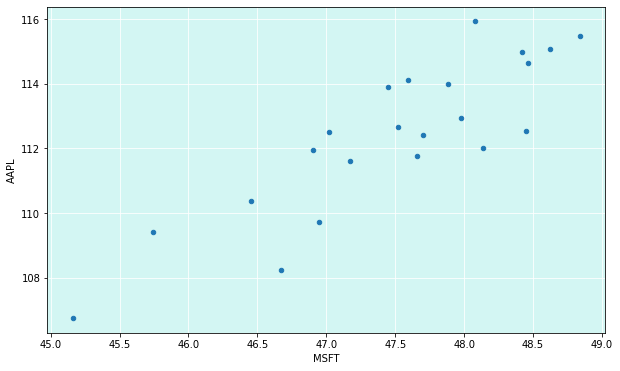

In [110]:
omh.plot(kind = 'scatter', x = 'MSFT', y = 'AAPL', zorder = 2, figsize = (10, 6))
plt.grid(True, color = 'w')
ax = plt.gca()
ax.set_facecolor('#D3F6F3')
plt.show()

In [111]:
# 直接排除非數值資料
# 預設樣本變異數與樣本共變異數
# 自己跟自己的共變異數就是變異數
omh.cov()

,MSFT,AAPL
MSFT,0.870632,1.926124
AAPL,1.926124,5.706231


In [112]:
omh.MSFT.var()

0.8706322510822512

In [113]:
omh.MSFT.cov(omh.AAPL)

1.9261240259740264

---

In [114]:
# 直接排除非數值資料
# 自己跟自己的相關係數一定是 1
omh.corr() 

,MSFT,AAPL
MSFT,1.000000,0.864156
AAPL,0.864156,1.000000


In [115]:
omh.MSFT.corr(omh.AAPL)

0.8641560684381171

In [116]:
omh.corrwith(omh.MSFT) # 其值為傳入 Series 與每欄的計算結果

MSFT    1.000000
AAPL    0.864156
dtype: float64

## 執行資料的離散化及分位數計算

In [117]:
np.random.seed(123456)
dist = np.random.normal(size = 10000) # 母體平均數 0 # 母體標準差 1
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

In [118]:
dist.mean(), dist.std()

(-0.002863324040906651, 1.008716203199891)

In [119]:
bins = pd.cut(dist, 5) # 建立五個大小相同 (長度相同) 的分群
bins

[(-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-2.077, -0.633], (0.81, 2.254], ..., (-2.077, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, interval[float64, right]): [(-3.528, -2.077] < (-2.077, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

In [120]:
type(bins) # 類別資料，會有專門的一節來講解

pandas.core.arrays.categorical.Categorical

In [121]:
bins.categories

IntervalIndex([(-3.528, -2.077], (-2.077, -0.633], (-0.633, 0.81], (0.81, 2.254], (2.254, 3.698]], dtype='interval[float64, right]')

In [122]:
bins.codes

array([2, 2, 1, ..., 2, 1, 2], dtype=int8)

In [123]:
bins.value_counts()

(-3.528, -2.077]     202
(-2.077, -0.633]    2463
(-0.633, 0.81]      5182
(0.81, 2.254]       2033
(2.254, 3.698]       120
dtype: int64

In [124]:
bins.describe() # 類別資料的 .describe() 方法

,counts,freqs
categories,,
"(-3.528, -2.077]",202,0.0202
"(-2.077, -0.633]",2463,0.2463
"(-0.633, 0.81]",5182,0.5182
"(0.81, 2.254]",2033,0.2033
"(2.254, 3.698]",120,0.0120


In [125]:
pd.cut(dist, 5, right = False) # 包含左端點不包含右端點

[[-0.633, 0.81), [-0.633, 0.81), [-2.077, -0.633), [-2.077, -0.633), [0.81, 2.254), ..., [-2.077, -0.633), [-0.633, 0.81), [-0.633, 0.81), [-2.077, -0.633), [-0.633, 0.81)]
Length: 10000
Categories (5, interval[float64, left]): [[-3.521, -2.077) < [-2.077, -0.633) < [-0.633, 0.81) < [0.81, 2.254) < [2.254, 3.705)]

---

In [126]:
np.random.seed(12345)
ages = np.random.randint(6, 45, 50)
ages

array([40, 43, 35,  7, 42, 43, 40, 35,  7, 20, 33, 22, 15, 17, 19, 16, 23,
       24, 44, 13, 29, 35, 37, 39, 33, 29, 42,  6,  9, 11, 21, 17, 20, 23,
       11, 40, 14, 11, 40, 11, 25, 18, 20, 22, 33, 44, 30, 38, 11, 16])

In [127]:
ranges = [6, 12, 18, 35, 50]
agebins = pd.cut(ages, bins = ranges, right = False)
agebins

[[35, 50), [35, 50), [35, 50), [6, 12), [35, 50), ..., [35, 50), [18, 35), [35, 50), [6, 12), [12, 18)]
Length: 50
Categories (4, interval[int64, left]): [[6, 12) < [12, 18) < [18, 35) < [35, 50)]

In [128]:
agebins.categories

IntervalIndex([[6, 12), [12, 18), [18, 35), [35, 50)], dtype='interval[int64, left]')

In [129]:
agebins.codes

array([3, 3, 3, 0, 3, 3, 3, 3, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 3,
       3, 3, 2, 2, 3, 0, 0, 0, 2, 1, 2, 2, 0, 3, 1, 0, 3, 0, 2, 2, 2, 2,
       2, 3, 2, 3, 0, 1], dtype=int8)

In [130]:
agebins.value_counts()

[6, 12)      9
[12, 18)     7
[18, 35)    18
[35, 50)    16
dtype: int64

In [131]:
agebins.describe()

,counts,freqs
categories,,
"[6, 12)",9,0.18
"[12, 18)",7,0.14
"[18, 35)",18,0.36
"[35, 50)",16,0.32


In [132]:
ranges = [6, 12, 18, 35, 50]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged']
agebins = pd.cut(ages, bins = ranges, right = False, labels = labels)
agebins

['Middle Aged', 'Middle Aged', 'Middle Aged', 'Youth', 'Middle Aged', ..., 'Middle Aged', 'Adult', 'Middle Aged', 'Youth', 'Young Adult']
Length: 50
Categories (4, object): ['Youth' < 'Young Adult' < 'Adult' < 'Middle Aged']

In [133]:
agebins.categories

Index(['Youth', 'Young Adult', 'Adult', 'Middle Aged'], dtype='object')

In [134]:
agebins.codes

array([3, 3, 3, 0, 3, 3, 3, 3, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 3,
       3, 3, 2, 2, 3, 0, 0, 0, 2, 1, 2, 2, 0, 3, 1, 0, 3, 0, 2, 2, 2, 2,
       2, 3, 2, 3, 0, 1], dtype=int8)

In [135]:
agebins.value_counts()

Youth           9
Young Adult     7
Adult          18
Middle Aged    16
dtype: int64

In [136]:
agebins.describe()

,counts,freqs
categories,,
Youth,9,0.18
Young Adult,7,0.14
Adult,18,0.36
Middle Aged,16,0.32


---

In [137]:
qbin = pd.qcut(dist, 5) # 依照分位數切割資料 # Quantile
qbin

[(0.261, 0.866], (-0.861, -0.241], (-3.522, -0.861], (-3.522, -0.861], (0.866, 3.698], ..., (-3.522, -0.861], (0.261, 0.866], (0.261, 0.866], (-0.861, -0.241], (-0.241, 0.261]]
Length: 10000
Categories (5, interval[float64, right]): [(-3.522, -0.861] < (-0.861, -0.241] < (-0.241, 0.261] < (0.261, 0.866] < (0.866, 3.698]]

In [138]:
qbin.value_counts()

(-3.522, -0.861]    2000
(-0.861, -0.241]    2000
(-0.241, 0.261]     2000
(0.261, 0.866]      2000
(0.866, 3.698]      2000
dtype: int64

In [139]:
qbin.describe()

,counts,freqs
categories,,
"(-3.522, -0.861]",2000,0.2
"(-0.861, -0.241]",2000,0.2
"(-0.241, 0.261]",2000,0.2
"(0.261, 0.866]",2000,0.2
"(0.866, 3.698]",2000,0.2


---

In [140]:
# 稍微複雜，參考用
# 每個點代表的是累積的分位數
quantiles = [0,
             0.001,
             0.021,
             0.5 - 0.341,
             0.5,
             0.5 + 0.341,
             1.0 - 0.021,
             1.0 - 0.001,
             1.0]
qbin = pd.qcut(dist, q = quantiles)
qbin

[(-0.00363, 1.011], (-1.033, -0.00363], (-2.056, -1.033], (-2.056, -1.033], (1.011, 2.043], ..., (-2.056, -1.033], (-0.00363, 1.011], (-0.00363, 1.011], (-1.033, -0.00363], (-1.033, -0.00363]]
Length: 10000
Categories (8, interval[float64, right]): [(-3.522, -3.131] < (-3.131, -2.056] < (-2.056, -1.033] < (-1.033, -0.00363] < (-0.00363, 1.011] < (1.011, 2.043] < (2.043, 3.062] < (3.062, 3.698]]

In [141]:
qbin.value_counts()

(-3.522, -3.131]        10
(-3.131, -2.056]       200
(-2.056, -1.033]      1380
(-1.033, -0.00363]    3410
(-0.00363, 1.011]     3410
(1.011, 2.043]        1380
(2.043, 3.062]         200
(3.062, 3.698]          10
dtype: int64

In [142]:
qbin.describe()

,counts,freqs
categories,,
"(-3.522, -3.131]",10,0.001
"(-3.131, -2.056]",200,0.020
"(-2.056, -1.033]",1380,0.138
"(-1.033, -0.00363]",3410,0.341
"(-0.00363, 1.011]",3410,0.341
"(1.011, 2.043]",1380,0.138
"(2.043, 3.062]",200,0.020
"(3.062, 3.698]",10,0.001


## 資料的排序與排名

In [143]:
obj = pd.Series(range(4), index = ['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [144]:
obj.sort_index() # 對索引標籤做排序 # not in-place

a    1
b    2
c    3
d    0
dtype: int64

---

In [145]:
frame = pd.DataFrame(np.arange(8).reshape(2, 4),
                    index = ['three', 'one'],
                    columns = ['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [146]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [147]:
frame.sort_index(axis = 1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [148]:
frame.sort_index(axis = 1, ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


---

In [149]:
obj = pd.Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [150]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [151]:
obj = pd.Series([4, np.NaN, 7, np.NaN, -3, 2])
obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [152]:
obj.sort_values() # NaN 會排在最後

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [153]:
obj.sort_values(ascending = False) # NaN 會排在最後

2    7.0
0    4.0
5    2.0
4   -3.0
1    NaN
3    NaN
dtype: float64

---

In [154]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [155]:
frame.sort_values(by = 'b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [156]:
frame.sort_values(by =['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


---

In [157]:
obj = pd.Series([10, 70, 30, 70])
obj

0    10
1    70
2    30
3    70
dtype: int64

In [158]:
# 預設 method = 'average'，也就是名次取平均
# 預設 ascending = True
obj.rank() 

0    1.0
1    3.5
2    2.0
3    3.5
dtype: float64

In [159]:
obj = pd.Series([10, 70, 70, 70])
obj

0    10
1    70
2    70
3    70
dtype: int64

In [160]:
obj.rank()

0    1.0
1    3.0
2    3.0
3    3.0
dtype: float64

---

In [161]:
obj = pd.Series([35, 10, 25, 40, 25], index = np.arange(4, -1, -1))
obj

4    35
3    10
2    25
1    40
0    25
dtype: int64

In [162]:
obj.rank(method = 'first') # 看位置來決定平手時的名次

4    4.0
3    1.0
2    2.0
1    5.0
0    3.0
dtype: float64

In [163]:
obj.rank(method = 'dense') 

4    3.0
3    1.0
2    2.0
1    4.0
0    2.0
dtype: float64

In [164]:
obj.rank(ascending = False, method = 'max') # 平手中的名次選最大的印出

4    2.0
3    5.0
2    4.0
1    1.0
0    4.0
dtype: float64

In [165]:
obj.rank(ascending = False, method = 'min') # 平手中的名次選最小的印出

4    2.0
3    5.0
2    3.0
1    1.0
0    3.0
dtype: float64

---

In [166]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2],
                      'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [167]:
frame.rank(method = 'dense')

,b,a,c
0,3.0,1.0,2.0
1,4.0,2.0,3.0
2,1.0,1.0,4.0
3,2.0,2.0,1.0


In [168]:
frame.rank(axis = 1)

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


## 計算序列樣本值的變動百分比

$$r_t = \frac{p_{t} - p_{t-1}}{p_{t-1}} = \frac{p_{t}}{p_{t-1}}-1 $$

In [169]:
omh = pd.read_csv('./mod02/omh.csv')
omh[:5]

,Date,MSFT,AAPL
0,2014-12-01,48.62,115.07
1,2014-12-02,48.46,114.63
2,2014-12-03,48.08,115.93
3,2014-12-04,48.84,115.49
4,2014-12-05,48.42,115.00


In [170]:
omh['MSFT'].pct_change()

0          NaN
1    -0.003291
2    -0.007842
3     0.015807
4    -0.008600
5    -0.014870
6    -0.002306
7    -0.014499
8     0.005757
9    -0.004664
10   -0.005964
11   -0.032355
12    0.012843
13    0.038916
14    0.002946
15    0.006714
16    0.009796
17   -0.006398
18   -0.005401
19   -0.008981
20   -0.009062
21   -0.012123
Name: MSFT, dtype: float64

In [171]:
# 簡單驗證
(omh['MSFT'].iloc[1] - omh['MSFT'].iloc[0])/omh['MSFT'].iloc[0]

-0.003290826820238515

## 執行移動視窗運算

In [172]:
np.random.seed(123456)
a = pd.Series(np.random.randn(1000))
a

0      0.469112
1     -0.282863
2     -1.509059
3     -1.135632
4      1.212112
         ...   
995   -1.512743
996    0.933753
997   -0.308013
998   -0.079915
999   -1.010589
Length: 1000, dtype: float64

In [173]:
b = a.cumsum() # 隨機漫步
b[:5]

0    0.469112
1    0.186249
2   -1.322810
3   -2.458442
4   -1.246330
dtype: float64

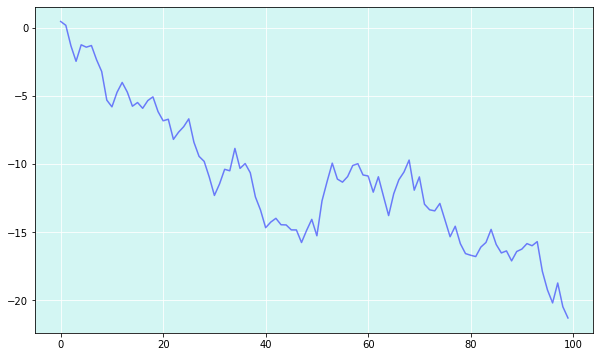

In [174]:
# 隨機漫步視覺化
b[:100].plot(figsize = (10, 6), style =['b-'], alpha = 0.5)
plt.grid(True, color = 'w')
ax = plt.gca()
ax.set_facecolor('#D3F6F3')
plt.show()

In [175]:
r = b.rolling(window = 3) # 建立 Rolling 物件
r

Rolling [window=3,center=False,axis=0,method=single]

In [176]:
means = r.mean() # 有很多方法可使用
means

0            NaN
1            NaN
2      -0.222483
3      -1.198334
4      -1.675860
         ...    
995   -44.685018
996   -44.763983
997   -45.059650
998   -44.877709
999   -45.343881
Length: 1000, dtype: float64

In [177]:
# 簡單驗證
b[:3].mean()

-0.22248276403642672

In [178]:
# 簡單驗證
b[1:4].mean()

-1.1983341702095498

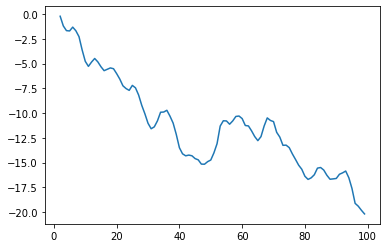

In [179]:
means[:100].plot() # 滾動平均讓走勢較緩和
plt.show()

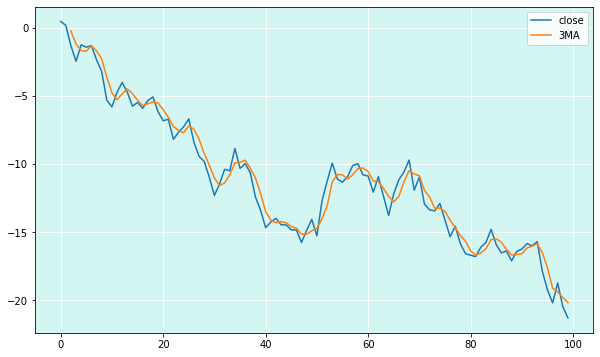

In [180]:
# 情境模擬
b[:100].plot(label = 'close', figsize = (10, 6))
means[:100].plot(label = '3MA')
plt.grid(True, color = 'w')
ax = plt.gca()
ax.set_facecolor('#D3F6F3')
plt.legend()
plt.show()

## 執行資料的隨機取樣

In [181]:
np.random.seed(123456)
df = pd.DataFrame(np.random.randn(50, 4))
df[:5]

,0,1,2,3
0,0.469112,-0.282863,-1.509059,-1.135632
1,1.212112,-0.173215,0.119209,-1.044236
2,-0.861849,-2.104569,-0.494929,1.071804
3,0.721555,-0.706771,-1.039575,0.271860
4,-0.424972,0.567020,0.276232,-1.087401


In [182]:
df.sample(n = 3)  #　預設不放回

,0,1,2,3
15,-0.076467,-1.187678,1.130127,-1.436737
28,-2.182937,0.380396,0.084844,0.432390
48,-0.693921,1.613616,0.464000,0.227371


In [183]:
df.sample(frac = 0.1) # 隨機抽出 10 %，不放回

,0,1,2,3
37,1.126203,-0.977349,1.474071,-0.064034
10,-1.294524,0.413738,0.276662,-0.472035
4,-0.424972,0.567020,0.276232,-1.087401
14,0.410835,0.813850,0.132003,-0.827317
48,-0.693921,1.613616,0.464000,0.227371


In [184]:
df.sample(frac = 0.1, replace = True) # 隨機抽出 10 %，放回

,0,1,2,3
27,-1.236269,0.896171,-0.487602,-0.082240
9,0.357021,-0.674600,-1.776904,-0.968914
27,-1.236269,0.896171,-0.487602,-0.082240
15,-0.076467,-1.187678,1.130127,-1.436737
9,0.357021,-0.674600,-1.776904,-0.968914


## .apply() 和 .applymap() 方法的使用

In [185]:
frame = pd.DataFrame(np.random.randn(4, 3), 
                     columns = list('bde'),
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.645522,-1.281844,1.339141
Ohio,0.830184,-0.117788,0.274250
Texas,-0.149960,-1.714778,-0.023542
Oregon,-1.562786,-0.700157,-1.085778


In [186]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    2.392970
d    1.596990
e    2.424919
dtype: float64

In [187]:
# 簡單驗證
frame.max() -frame.min()

b    2.392970
d    1.596990
e    2.424919
dtype: float64

In [188]:
frame.apply(f, axis = 1) 

Utah      2.620985
Ohio      0.947973
Texas     1.691237
Oregon    0.862630
dtype: float64

---

In [189]:
frame

,b,d,e
Utah,-0.645522,-1.281844,1.339141
Ohio,0.830184,-0.117788,0.274250
Texas,-0.149960,-1.714778,-0.023542
Oregon,-1.562786,-0.700157,-1.085778


In [190]:
def f(x):
    return pd.Series([x.min(), x.max()], index = ['min', 'max'])

frame.apply(f)

,b,d,e
min,-1.562786,-1.714778,-1.085778
max,0.830184,-0.117788,1.339141


In [191]:
frame.apply(f, axis = 1)

,min,max
Utah,-1.281844,1.339141
Ohio,-0.117788,0.830184
Texas,-1.714778,-0.023542
Oregon,-1.562786,-0.700157


---

In [192]:
f = lambda x : '{0:.2f}'.format(x)

frame.applymap(f) #  資料框的方法，作用在每個元素上

,b,d,e
Utah,-0.65,-1.28,1.34
Ohio,0.83,-0.12,0.27
Texas,-0.15,-1.71,-0.02
Oregon,-1.56,-0.70,-1.09


In [193]:
frame['e'].map(f) # 序列要用 .map()方法 或 .apply()方法

Utah       1.34
Ohio       0.27
Texas     -0.02
Oregon    -1.09
Name: e, dtype: object

---

In [194]:
np.abs(frame) # NumPy 的全域函式對 pandas 也適用 # not in-place

,b,d,e
Utah,0.645522,1.281844,1.339141
Ohio,0.830184,0.117788,0.274250
Texas,0.149960,1.714778,0.023542
Oregon,1.562786,0.700157,1.085778


In [195]:
frame

,b,d,e
Utah,-0.645522,-1.281844,1.339141
Ohio,0.830184,-0.117788,0.274250
Texas,-0.149960,-1.714778,-0.023542
Oregon,-1.562786,-0.700157,-1.085778


In [196]:
frame.applymap(lambda x: abs(x)) # not in-place

,b,d,e
Utah,0.645522,1.281844,1.339141
Ohio,0.830184,0.117788,0.274250
Texas,0.149960,1.714778,0.023542
Oregon,1.562786,0.700157,1.085778


In [197]:
frame

,b,d,e
Utah,-0.645522,-1.281844,1.339141
Ohio,0.830184,-0.117788,0.274250
Texas,-0.149960,-1.714778,-0.023542
Oregon,-1.562786,-0.700157,-1.085778
